In [ ]:
%pip install pandas_montecarlo --upgrade --no-cache-dir


In [2]:
import pandas as pd
import numpy as np
import pandas_montecarlo

# Shiller monthly data

In [3]:
# From shiller 
df = pd.read_excel("ie_data.xls", "Data")


In [4]:
df[7:].head(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
7,1871.01,4.44,0.26,0.4,12.464061,1871.041667,5.32,97.250271,5.694836,97.250271,...,NaN,NaN,NaN,NaN,NaN,1.004177,1,0.130609,0.092504,0.038106
8,1871.02,4.5,0.26,0.4,12.844641,1871.125,5.323333,95.644049,5.526101,96.104557,...,NaN,NaN,NaN,NaN,NaN,1.00418,0.974424,0.130858,0.094635,0.036224
9,1871.03,4.61,0.26,0.4,13.034972,1871.208333,5.326667,96.551327,5.445411,97.472173,...,NaN,NaN,NaN,NaN,NaN,1.004183,0.964209,0.130951,0.096186,0.034765
10,1871.04,4.74,0.26,0.4,12.559226,1871.291667,5.33,103.034548,5.651684,104.492692,...,NaN,NaN,NaN,NaN,NaN,1.004185,1.004919,0.122056,0.090972,0.031084
11,1871.05,4.86,0.26,0.4,12.273812,1871.375,5.333333,108.099637,5.783108,110.118209,...,NaN,NaN,NaN,NaN,NaN,1.004188,1.032591,0.122638,0.089488,0.03315
12,1871.06,4.82,0.26,0.4,12.083481,1871.458333,5.336667,108.898625,5.8742,111.430773,...,NaN,NaN,NaN,NaN,NaN,1.004191,1.053249,0.123093,0.087725,0.035368
13,1871.07,4.73,0.26,0.4,12.083481,1871.541667,5.34,106.865248,5.8742,109.851015,...,NaN,NaN,NaN,NaN,NaN,1.004194,1.057663,0.120022,0.086581,0.033441
14,1871.08,4.79,0.26,0.4,11.893231,1871.625,5.343333,109.951982,5.968166,113.535234,...,NaN,NaN,NaN,NaN,NaN,1.004197,1.079088,0.111933,0.082669,0.029264
15,1871.09,4.84,0.26,0.4,12.178646,1871.708333,5.346667,108.496009,5.828298,112.533332,...,NaN,NaN,NaN,NaN,NaN,1.004199,1.058222,0.110028,0.081048,0.02898
16,1871.1,4.59,0.26,0.4,12.368896,1871.791667,5.35,101.309267,5.738651,105.575174,...,NaN,NaN,NaN,NaN,NaN,1.004202,1.04632,0.114765,0.081653,0.033113


In [6]:
# get percent change m-o-m
df2 = df[7:1808]
df2["pct"] = pd.to_numeric(df2["Unnamed: 1"]).pct_change()
stdev = df2["pct"].std()
# print stdev as percentage
print("Stdev ", stdev * 100)

Stdev  4.0696146685580254


/var/folders/b7/nt75slqx7lgc80c_xh9gxg640000gn/T/ipykernel_26637/2515056669.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["pct"] = pd.to_numeric(df2["Unnamed: 1"]).pct_change()


In [7]:
df2[["Unnamed: 0", "Unnamed: 1", "pct"]].head(20)

,Unnamed: 0,Unnamed: 1,pct
7,1871.01,4.44,NaN
8,1871.02,4.5,0.013514
9,1871.03,4.61,0.024444
10,1871.04,4.74,0.028200
11,1871.05,4.86,0.025316
12,1871.06,4.82,-0.008230
13,1871.07,4.73,-0.018672
14,1871.08,4.79,0.012685
15,1871.09,4.84,0.010438
16,1871.1,4.59,-0.051653


In [10]:
# For each month, if the change is greater than the threshold then add the gain, else subtract the loss.
# Plain vanilla, rest is all invested in mkt, so gets market returns

winThreshold = 2 * stdev  # capture the tail
multiplier = 2
# Cost, it is 2 sided, remember. 0.25% per month is the typical cost at 2 stdev
costOfOptions = multiplier * 0.25 / 100


def gain(row):
    if row["pct"] <= 0:
        # Make sure polarity of cost of options always reduces returns
        mainPfReturns = (1 + costOfOptions) * row["pct"]
        optionReturns = 0
        if row["pct"] < -winThreshold:
            optionReturns = -row["pct"] - winThreshold * multiplier / 2
        return mainPfReturns + optionReturns
    elif row["pct"] > 0:
        # Make sure polarity of cost of options always reduces returns
        mainPfReturns = (1 - costOfOptions) * row["pct"]
        optionReturns = 0
        if row["pct"] > winThreshold:
            optionReturns = row["pct"] - winThreshold * multiplier / 2
        return mainPfReturns + optionReturns


df2["gain_pct"] = df2.apply(lambda row: gain(row), axis=1)
portfolioVal = df2.head(1)["Unnamed: 1"].values[0]
pfList = [portfolioVal]
# shift the gain by 1 week for comparison and iterate over all rows of df2
for i, row in df2.shift(-1).iterrows():
    if np.isnan(row["gain_pct"]):
        continue
    portfolioVal += portfolioVal * row["gain_pct"]
    pfList.append(portfolioVal)
print(
    "Strategy ending val ",
    portfolioVal,
    "Months ",
    len(pfList),
    len(df2),
    "Ending val buy and hold ",
    df2.tail(1)["Unnamed: 1"],
)


Strategy ending val  59562.211523152706 Months  1801 1801 Ending val buy and hold  1807    3793.748421
Name: Unnamed: 1, dtype: object


/var/folders/b7/nt75slqx7lgc80c_xh9gxg640000gn/T/ipykernel_26637/2195253215.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["gain_pct"] = df2.apply(lambda row: gain(row), axis=1)


# Plotting the wins

<AxesSubplot:>

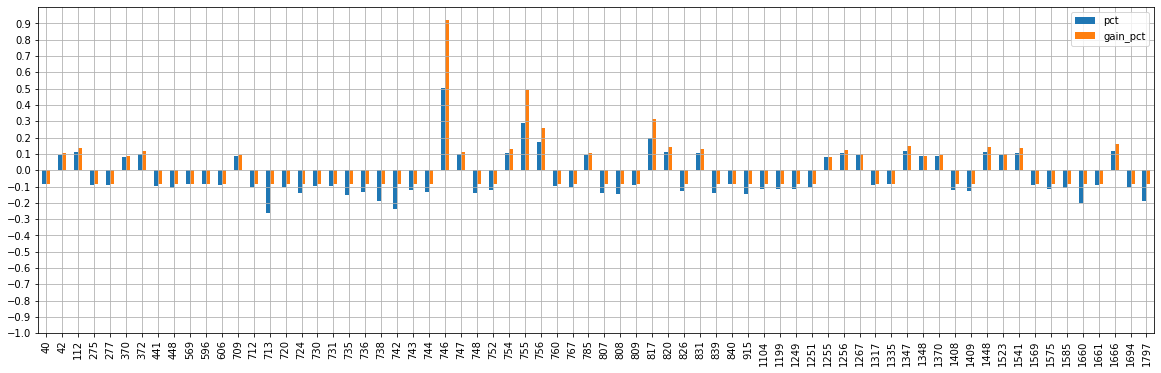

In [13]:
df2[(df2["pct"] > winThreshold) | (df2["pct"] < -winThreshold)][
    ["pct", "gain_pct"]
].plot(
    kind="bar",
    ylim=(-1, 1),
    figsize=(20, 6),
    grid=True,
    yticks=tuple(np.arange(-1, 1, 0.1)),
)


In [44]:
print(
    "2SD wins ",
    len(df2[(df2["pct"] > winThreshold)]),
    "2SD losses ",
    len(df2[(df2["pct"] < -winThreshold)]),
)


2SD wins  24 2SD losses  46


In [16]:
# How we do in the drawdowns
df2[(df2['pct'] < -winThreshold)][["Unnamed: 1", "portfolio", "pct", "gain_pct"]]

,Unnamed: 1,portfolio,pct,gain_pct
40,4.19,4.203276,-0.087146,-0.081828
275,4.84,4.940836,-0.088512,-0.081835
277,4.18,4.319736,-0.093275,-0.081859
441,8.35,8.752283,-0.098272,-0.081884
448,6.64,7.161842,-0.108725,-0.081936
569,7.04,7.498920,-0.083333,-0.081809
596,8.1,8.606254,-0.082673,-0.081806
606,6.81,7.286517,-0.089572,-0.081840
712,27.99,30.523700,-0.105751,-0.081921
713,20.58,27.998903,-0.264737,-0.082716


/var/folders/b7/nt75slqx7lgc80c_xh9gxg640000gn/T/ipykernel_26637/3431037843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["portfolio"] = pfList


<AxesSubplot:>

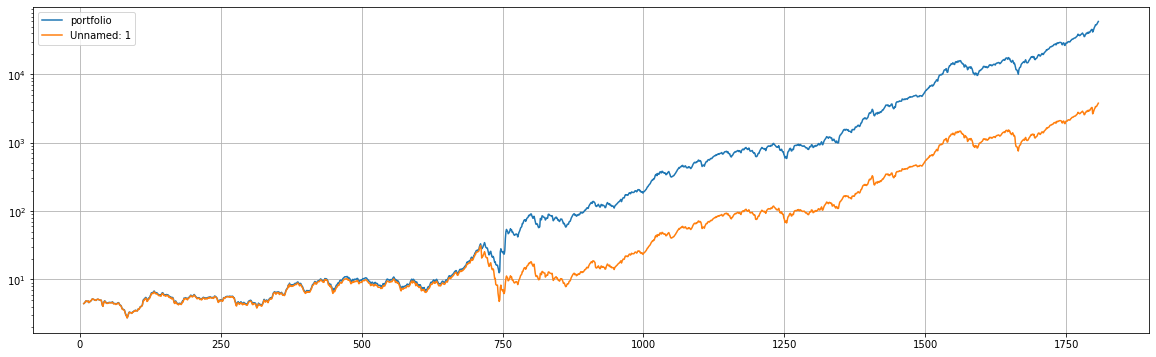

In [15]:
df2["portfolio"] = pfList
df2[['portfolio','Unnamed: 1']].plot(figsize=(20,6), grid=True, logy=True)

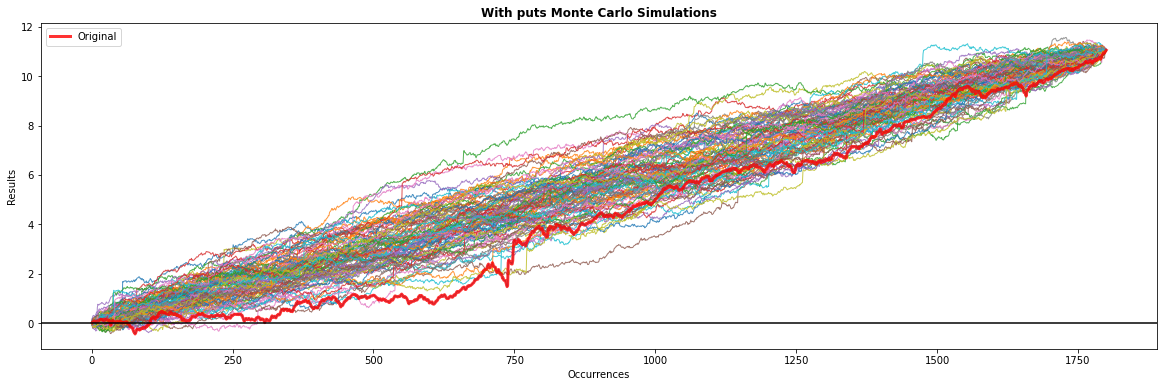

{'min': 11.05069206976364, 'max': 11.050692069763695, 'mean': 11.050692069763672, 'median': 11.05069206976367, 'std': 1.0584620216395463e-14, 'maxdd': -0.440871751269468, 'bust': 0.19, 'goal': 0.81}


In [17]:

mc = df2['gain_pct'].montecarlo(sims=100, bust=-0.2, goal=1)
mc.plot(title="With puts Monte Carlo Simulations", figsize=(20, 6))
print(mc.stats)

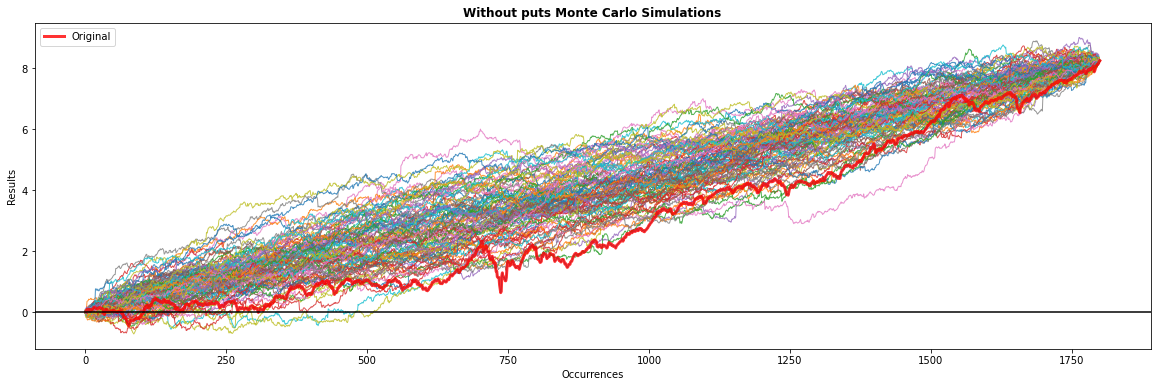

{'min': 8.250132331879206, 'max': 8.250132331879241, 'mean': 8.250132331879225, 'median': 8.250132331879225, 'std': 8.26656349103221e-15, 'maxdd': -0.7175978240072907, 'bust': 0.26, 'goal': 0.74}


In [18]:

mc = df2['pct'].montecarlo(sims=100, bust=-0.2, goal=1)
mc.plot(title="Without puts Monte Carlo Simulations", figsize=(20, 6))
print(mc.stats)

In [194]:
# If you want to dump to csv
# df2["power"] = pfList
# df2.to_csv("/Users/shan/Documents/power3.csv", index=False)

/var/folders/b7/nt75slqx7lgc80c_xh9gxg640000gn/T/ipykernel_93425/1493197684.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# With no mkt investment at all, pure barbell

In [58]:
# For each month, if the change is greater than the threshold then add the gain, else subtract the loss.
# BARBELL

df3 = df2

winThreshold = 2 * stdev  # capture the tail

multiplier = 1 # Must be divisible by 2 if following is False
usePutsOnly = True

interestPerMo = 6.25 / (100 * 12) # NOTE: LOL! OR Get by selling calls?
costOfOptions = (multiplier * 0.25 / 100) - interestPerMo 

def gain(row):
    if usePutsOnly:
        # Here cost of options is always negative as you are not using market returns
        if row["pct"] < -winThreshold:
            # Do not divide the multiplier by 2
            retVal = -costOfOptions + (-row["pct"] - winThreshold) * multiplier
            return retVal
        else:
            retVal = -costOfOptions
            return retVal
    else:
        # Here cost of options is always negative as you are not using market returns
        if row["pct"] > winThreshold:
            retVal = -costOfOptions + (row["pct"] - winThreshold) * multiplier / 2
            return retVal
        elif row["pct"] < -winThreshold:
            retVal = -costOfOptions + (-row["pct"] - winThreshold) * multiplier / 2
            return retVal
        else:
            retVal = -costOfOptions
            return retVal


df3["gain_pct"] = df3.apply(lambda row: gain(row), axis=1)
# shift the gain by 1 week for comparison
portfolioVal = df3.head(1)["Unnamed: 1"].values[0]
pfList = [portfolioVal]
# iterate over all rows of df3
for i, row in df3.shift(-1).iterrows():
    # Check gain_pct is nan
    if np.isnan(row["gain_pct"]):
        continue
    portfolioVal += portfolioVal * row["gain_pct"]
    pfList.append(portfolioVal)
print(portfolioVal, len(pfList), len(df3), df3.tail(1)["Unnamed: 1"])


3462.4578147175644 1801 1801 1807    3793.748421
Name: Unnamed: 1, dtype: object


/var/folders/b7/nt75slqx7lgc80c_xh9gxg640000gn/T/ipykernel_26637/2368190118.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["gain_pct"] = df3.apply(lambda row: gain(row), axis=1)


<AxesSubplot:>

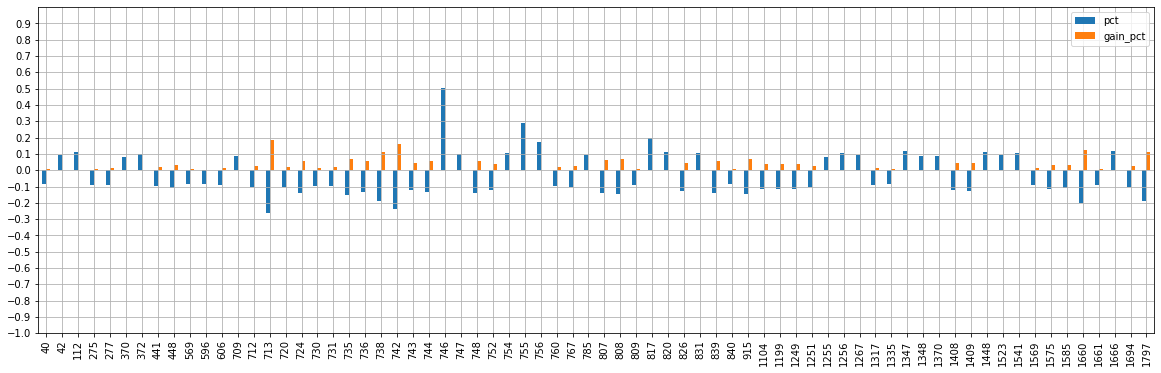

In [59]:
df3[(df3["pct"] > winThreshold) | (df3["pct"] < -winThreshold)][
    ["pct", "gain_pct"]
].plot(
    kind="bar",
    ylim=(-1, 1),
    figsize=(20, 6),
    grid=True,
    yticks=tuple(np.arange(-1, 1, 0.1)),
)


/var/folders/b7/nt75slqx7lgc80c_xh9gxg640000gn/T/ipykernel_26637/2105310843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["portfolio"] = pfList


<AxesSubplot:>

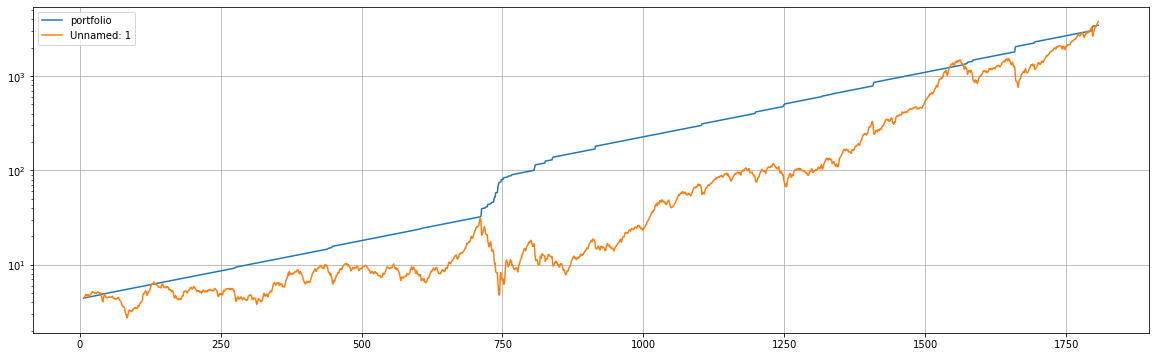

In [60]:
df3["portfolio"] = pfList
df3[['portfolio','Unnamed: 1']].plot(figsize=(20,6), grid=True, logy=True)

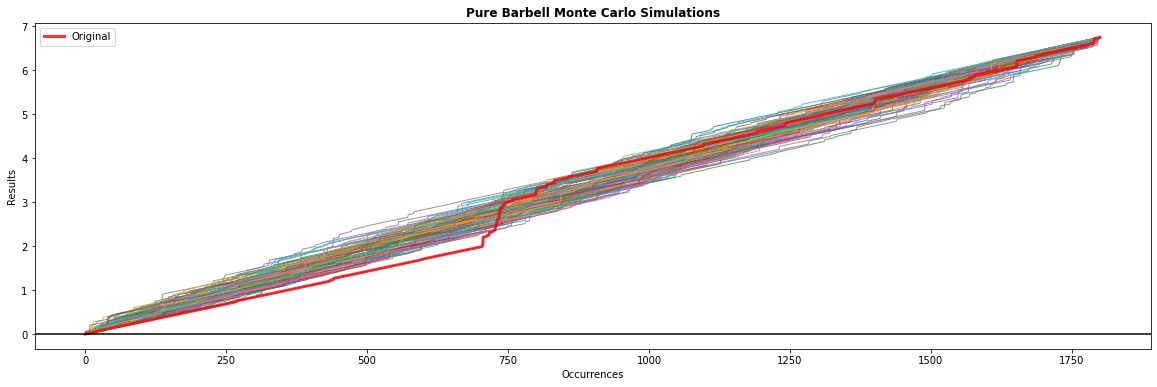

{'min': 6.741666470072734, 'max': 6.7416664700728015, 'mean': 6.741666470072775, 'median': 6.741666470072774, 'std': 1.1659632469897484e-14, 'maxdd': nan, 'bust': 0.0, 'goal': 1.0}


In [61]:

mc = df3['gain_pct'].montecarlo(sims=100, bust=-0.2, goal=1)
mc.plot(title="Pure Barbell Monte Carlo Simulations", figsize=(20, 6))
print(mc.stats)

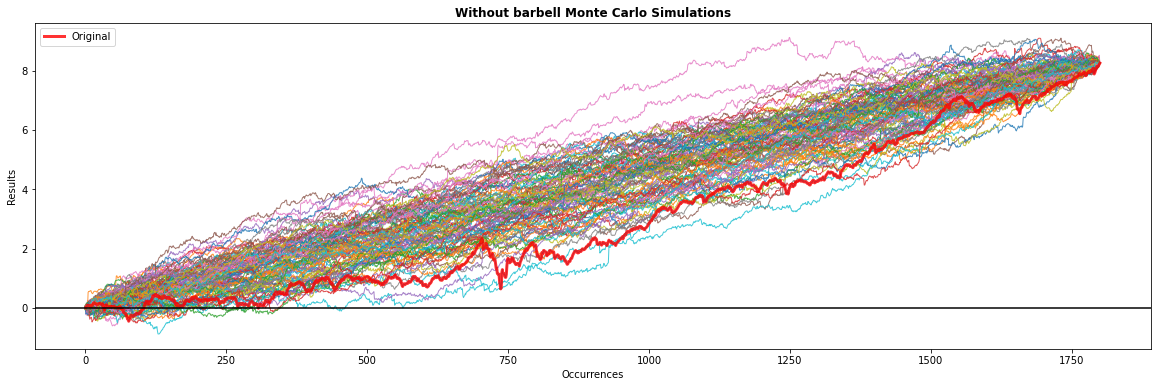

{'min': 8.250132331879191, 'max': 8.250132331879243, 'mean': 8.250132331879223, 'median': 8.250132331879225, 'std': 8.84222148719265e-15, 'maxdd': -0.8811239116844646, 'bust': 0.28, 'goal': 0.72}


In [43]:

mc = df3['pct'].montecarlo(sims=100, bust=-0.2, goal=1)
mc.plot(title="Without barbell Monte Carlo Simulations", figsize=(20, 6))
print(mc.stats)

In [209]:
print(df2[["Unnamed: 1", "portfolio", "pct", "gain_pct"]].tail(20))

       Unnamed: 1    portfolio       pct  gain_pct
1788      2890.17  2890.170000  0.012422  0.002751
1789  2996.113636  2996.113636  0.036657  0.002751
1790  2897.498182  2897.498182 -0.032914  0.002751
1791     2982.156  2982.156000  0.029218  0.002751
1792      2977.68  2977.680000 -0.001501  0.002751
1793    3104.9045  3104.904500  0.042726  0.002751
1794  3176.749524  3176.749524  0.023139  0.002751
1795  3278.202857  3278.202857  0.031936  0.002751
1796  3277.314211  3287.222625 -0.000271  0.002751
1797  2652.393636  3660.099318 -0.190681  0.113432
1798  2761.975238  3670.169850  0.041314  0.002751
1799     2919.615  3680.268090  0.057075  0.002751
1800  3104.660909  3690.394115  0.063380  0.002751
1801  3207.619091  3700.548001  0.033162  0.002751
1802      3391.71  3710.729825  0.057392  0.002751
1803  3365.516667  3720.939664 -0.007723  0.002751
1804  3418.701364  3731.177594  0.015803  0.002751
1805    3548.9925  3741.443693  0.038111  0.002751
1806      3695.31  3751.738039 

# Daily DOW data

In [172]:
df2 = pd.read_csv("/Users/shan/Documents/RWRI Code/USETHIS.csv")
df2 = df2[5400:]
# reverse df2
# df2 = df2.iloc[::-1]

df2.head(10)

,Date,Value
5400,1914-12-14,56.76
5401,1914-12-15,55.07
5402,1914-12-16,55.35
5403,1914-12-17,55.36
5404,1914-12-18,55.09
5405,1914-12-19,55.2
5406,1914-12-21,54.46
5407,1914-12-22,54.42
5408,1914-12-23,53.46
5409,1914-12-24,53.17


In [169]:
df2.tail(10)

,Date,Value
34008,"Nov 16, 2021","36,142.22"
34009,"Nov 17, 2021","35,931.05"
34010,"Nov 18, 2021","35,870.95"
34011,"Nov 19, 2021","35,601.98"
34012,"Nov 22, 2021","35,619.25"
34013,"Nov 23, 2021","35,813.80"
34014,"Nov 24, 2021","35,804.38"
34015,"Nov 26, 2021","34,899.34"
34016,"Nov 29, 2021","35,135.94"
34017,"Nov 30, 2021","34,483.72"


In [173]:
# Every 20th row, monthly (approx)

df2['Value'] = df2['Value'].str.replace(',', '').astype(float)
df2 = df2[::20]
df2["pct"] = pd.to_numeric(df2["Value"]).pct_change()
df2["pct"].std()
#df2.tail()

0.04889108328754044

In [170]:
# Every 250th row, yearly (approx)

df2['Value'] = df2['Value'].str.replace(',', '').astype(float)
df2 = df2[::250]
df2["pct"] = pd.to_numeric(df2["Value"]).pct_change()
df2["pct"].std()
#df2.tail()

0.20918795498090934

In [159]:
# Every 5th row, weekly

df2['Value'] = df2['Value'].str.replace(',', '').astype(float)
df2 = df2[::5]
df2["pct"] = pd.to_numeric(df2["Value"]).pct_change()
df2["pct"].std()
#df2.tail()

0.024128297022743318

In [120]:
# For each week, if the change is greater than 2.4% then add the gain, else subtract 0.4%
winThreshold = 7.5/100 # 2 SD
lossPerWeek = -40/17000 # Cost per week of buying
callPremium = 160/17000
lots = -callPremium / lossPerWeek
def gain(row):
    if row["pct"] > winThreshold:
        #return (row["pct"] - winThreshold) * lots - 1*row["pct"] # subtract call loss
        return (row["pct"] - winThreshold) * lots # Call loss covered by long pf
    elif row["pct"] < -winThreshold:
        return ((-1 * row["pct"]) - winThreshold) * lots # no need to add call win
    elif row["pct"] > 0:
        #return -row["pct"]
        return 0 # Call loss covered by long pf
    else: # call premium given up
        return 0
        return row["pct"] * 4
        return lossPerWeek

df2["gain_pct"] = df2.apply(lambda row: gain(row), axis=1)

In [174]:
# For each week, if the change is greater than the threshold then add the gain, else subtract the loss. Plain vanilla
winThreshold = 10/100 # 2 SD
lossPerWeek = -.1/17000 # Cost per week of buying
def gain(row):
    if row["pct"] > winThreshold:
        return (row["pct"] - winThreshold)
    elif row["pct"] < -winThreshold:
        return ((-1 * row["pct"]) - winThreshold)*10
    else:
        return lossPerWeek

df2["gain_pct"] = df2.apply(lambda row: gain(row), axis=1)
# shift the gain by 1 week for comparison
portfolioVal = 56.76
pfList = [portfolioVal]
# iterate over all rows of df2
for i,row in df2.shift(-1).iterrows():
    # Check gain_pct is nan
    if np.isnan(row["gain_pct"]):
        continue
    portfolioVal += (portfolioVal*row["gain_pct"])
    pfList.append(portfolioVal)
print(portfolioVal, len(pfList), len(df2))

5698911.465891271 1431 1431


Only Puts

In [113]:

# For each week, if the change is greater than the threshold then add the gain, else subtract the loss. Plain vanilla
winThreshold = 2 * 3.5/100 
lossPerWeek = -.01/17000 # Cost per week of buying

def gain(row):
    global cntWin
    if row["pct"] > winThreshold:
        return lossPerWeek
    elif row["pct"] < -winThreshold:
        return ((-1 * row["pct"]) - winThreshold)*10
    else:
        return lossPerWeek

print(len(df2))
df2["gain_pct"] = df2.apply(lambda row: gain(row), axis=1)

5724


In [114]:
# shift the gain by 1 week for comparison
portfolioVal = 56.76
pfList = [portfolioVal]
# iterate over all rows of df2
for i,row in df2.shift(-1).iterrows():
    # Check gain_pct is nan
    if np.isnan(row["gain_pct"]):
        continue
    portfolioVal += (portfolioVal*row["gain_pct"])
    pfList.append(portfolioVal)
print(portfolioVal, len(pfList), len(df2))

1317936.2013984558 5724 5724


* Only calls

In [121]:

# For each week, if the change is greater than the threshold then add the gain, else subtract the loss. Plain vanilla
winThreshold = 2*3.05/100 # 1.5SD approx
winThreshold = 2*3.5/100 # 1.5SD approx
lossPerWeek = -.01/17000 # Cost per week of buying
def gain(row):
    if row["pct"] < -winThreshold:
        return lossPerWeek
    elif row["pct"] > winThreshold:
        return (row["pct"] - winThreshold)*10
    else:
        return lossPerWeek

df2["gain_pct"] = df2.apply(lambda row: gain(row), axis=1)

In [122]:
# shift the gain by 1 week for comparison
portfolioVal = 56.76
pfList = [portfolioVal]
# iterate over all rows of df2
for i,row in df2.shift(-1).iterrows():
    # Check gain_pct is nan
    if np.isnan(row["gain_pct"]):
        continue
    portfolioVal += (portfolioVal*row["gain_pct"])
    pfList.append(portfolioVal)
print(portfolioVal, len(pfList), len(df2))

273857.095477357 5724 5724


In [103]:
df2["power"] = pfList
df2.to_csv("/Users/shan/Documents/power2.csv", index=False)

In [141]:
nifweekly = """1000
948.82
898.86
871.11
873.05
887.12
883.41
900.65
908.53
884.73
875.15
843.99
814.92
918.31
1033.02
1023.08
1028.84
999.47
988.62
981.87
956.11
985.3
1010.94
1032.19
1131.74
1123.63
1119.48
1078.63
1115.54
1085.03
1089.92
1133.44
1196.06
1157.42
1122
1093
1089.35
1119.27
1051.24
1032.94
1037.91
1002.25
1012.71
1029
1032.09
980.72
977.03
947.23
904.12
908.79
895
936.95
906.68
880.36
894.31
850.33
830.32
808.19
824.62
884.38
911.8
931.65
980.35
1001.75
985.9
972.65
978.8
1009.45
991.55
1102.95
1127.25
1070.1
1061.4
1057.8
1001
1003.25
1035.2
1069.4
1069
1053.35
1048.4
1033.7
1050.9
1082.75
1136.3
1158.35
1169.65
1216.1
1221.1
1181.4
1185.05
1232.4
1256.95
1227.9
1160.45
1105
1149.25
1142.85
1104.3
1116.1
1114.7
1163.55
1177.8
1136.65
1085.25
1074.8
1022.4
1005.75
1023.95
1006.3
965.15
1028.4
1061.45
1086.2
1033.55
997.8
986.8
963.45
977.65
974.55
993.65
1060.75
1081.45
1077.5
1109.6
1140.35
1173.45
1192.4
1210
1173.8
1159.35
1161.55
1110.1
1126.55
1063.15
993.5
971.15
913.25
924.35
900.55
980.15
1000.95
920.1
931.4
895.55
864.1
855.45
849.8
866.5
899.7
901.65
934.95
904.95
849.1
839.5
817.35
824
840.8
867.25
857.4
810.85
828.35
870
835.2
861.1
890.8
990.05
934.3
957.05
966.2
936.3
970.25
976.3
981.3
1054.45
1072.65
1060.35
1041.25
1063.45
993.4
966.95
982
978.2
1062.9
1165.35
1145.85
1081.5
1155.05
1141.9
1175.15
1177
1197.85
1254
1324.25
1342.95
1310.15
1316.8
1291.85
1347.3
1417.5
1374.95
1391.1
1359.7
1412.25
1403.2
1479.25
1454.55
1449.8
1325.45
1369.6
1373.55
1361.85
1399.6
1418
1439.7
1419.3
1459
1480.45
1613.3
1622.75
1620.6
1599.1
1599.75
1756
1717.8
1710.45
1656
1602.75
1562.2
1569.55
1528.45
1557.15
1518.65
1415.65
1406.55
1422.4
1282.8
1268
1275.35
1389.25
1467.2
1477.3
1472.2
1471.45
1517.6
1509.75
1397.25
1333.8
1318.55
1310.75
1358.05
1381.25
1394.1
1450.05
1417.2
1266.45
1271.65
1285
1176.75
1172
1178.7
1242.05
1239.55
1236
1225.2
1276.2
1313.7
1312.6
1242
1263.55
1327.25
1286.75
1329.1
1370.1
1378.85
1405.7
1381.35
1320.45
1306.35
1254.75
1193.55
1161.3
1148.2
1139.6
1024.9
1144
1101.3
1130.05
1140.5
1172.8
1174.9
1148.05
1126.6
1087.75
1087.65
1107.9
1065.1
1110.45
1077.7
1051.7
1074.6
1071.15
1069.2
1069.15
1053.75
1035.2
919.7
854.2
913.85
914.6
960.4
976.65
983.2
997.6
1004.05
1035.7
1059
1067.15
1112.3
1087.85
1050.85
1033.8
1096.2
1088.55
1093.15
1080.1
1081.65
1123.75
1159.95
1163.5
1178
1187.65
1169.75
1138.45
1129.55
1141.95
1146.5
1100.3
1097.4
1096.95
1116.4
1090.65
1067
1028.8
1048.8
1085.7
1062.55
1057.8
1073.8
1058.25
1035.9
973.5
954.75
961.95
979.25
995.2
1010.6
995.2
992
969.6
976.45
948.2
971.05
971.65
932.2
951.45
956.95
990.35
1020.15
1050.15
1069.8
1086.2
1079.3
1098.4
1089.6
1080.25
1086.5
1056.05
1041.85
1057.5
1036
1066.15
1063.4
1017.1
999.65
1037.15
1000.6
1016.95
949.8
940.7
924.3
938.3
937.85
973.1
967.9
1006.8
1046.4
1056.2
1100.25
1125.55
1138.45
1161.65
1140
1162.75
1195.75
1222.65
1247.75
1311.15
1356.55
1398.4
1372.1
1322.15
1386.95
1449.3
1523.1
1569.45
1521.95
1555.9
1592.05
1562.8
1540.7
1615.25
1645.8
1698.9
1778.55
1837.05
1946.05
1971.9
1900.65
1847.55
1809.75
1833.65
1913.6
1852.65
1800.3
1867.7
1812.2
1725.1
1747.5
1841.1
1853.55
1868.1
1892.45
1796.1
1804.45
1582.4
1560.2
1508.75
1521.1
1508.45
1491.2
1488.5
1537.5
1553.2
1558.8
1601.6
1632.3
1633.4
1598.2
1590.35
1609
1634.1
1668.75
1733.65
1722.5
1775.15
1817.8
1795
1779.75
1786.9
1852.3
1872.95
1872.35
1901.05
1996.2
1969
2012.1
2062.7
2080.5
2015.5
1931.1
1925.3
2008.3
2077.95
2082.05
2055.55
2060.9
2148.15
2154
2109.15
2015.4
2067.65
2031.2
1956.3
1967.35
1902.5
1977.5
1988.3
1992.4
2076.4
2092.35
2090.6
2123.4
2194.35
2211.9
2196.2
2212.55
2265.6
2312.3
2361.2
2361.55
2383.45
2357.05
2415.8
2455.45
2552.35
2477.75
2601.4
2574.05
2484.4
2443.75
2316.05
2419.05
2548.65
2620.05
2683.45
2697.95
2756.45
2810.15
2804.85
2836.55
2914
2850.55
2900.95
2982.75
2940.6
3027.55
2981.5
3050.05
3147.35
3183.9
3234.05
3279.8
3402.55
3454.8
3345.5
3573.05
3557.6
3663.95
3650.05
3246.9
3209.6
3091.35
2866.3
2890.35
3050.3
3128.2
3075.85
3123.35
2945
3130.8
3176.75
3274.35
3356.75
3385.95
3435.45
3471.45
3478.6
3544.05
3588.4
3569.7
3676.05
3683.5
3739.35
3805.35
3834.75
3852.8
3950.85
3997.6
3962
3888.65
3871.15
3966.4
3983.4
4052.45
4090.15
4147.7
4183.5
4187.4
4146.2
3938.95
3726.75
3718
3608.55
3861.05
3821.55
3752
3917.35
4083.55
4083.5
4117.35
4076.65
4214.5
4248.15
4297.05
4145
4171.45
4252.05
4318.3
4384.85
4504.55
4566.05
4445.2
4401.55
4333.35
4108.05
4190.15
4464
4509.5
4518
4837.55
5021.35
5185.85
5428.25
5215.3
5702.3
5932.4
5663.25
5906.85
5608.6
5762.75
5974.3
6047.7
5766.5
6079.7
6274.3
6200.1
5705.3
5383.35
5317.25
5120.35
5302.9
5110.75
5223.5
4771.6
4745.8
4573.95
4942
4647
4777.8
4958.4
5111.7
5228.2
4982.6
5157.7
4946.55
4870.1
4627.8
4517.1
4347.55
4136.65
4016
4049
4092.25
4311.85
4413.55
4529.5
4430.7
4327.45
4360
4352.3
4228.45
4245.25
3985.25
3818.3
3279.95
3074.35
2584
2885.6
2973
2810.35
2693.45
2755.1
2714.4
2921.35
3077.5
2857.25
3046.75
2873
2828.45
2678.55
2874.8
2843.1
2948.35
2736.45
2763.65
2620.15
2719.25
2807.05
3108.65
3211.05
3342.05
3384.4
3480.75
3473.95
3620.7
3671.65
4238.5
4448.95
4586.9
4583.4
4313.6
4375.5
4424.25
4003.9
4374.95
4568.55
4636.45
4481.4
4580.05
4528.8
4732.35
4680.4
4829.55
4976.05
4958.95
5083.4
4945.2
5141.8
4997.05
4711.7
4796.15
4998.95
5052.45
4941.75
5108.9
5117.3
4987.7
5178.4
5201.05
5244.75
5252.2
5036
4882.05
4757.25
4826.85
4844.9
4922.3
5088.7
5137
5262.8
5282
5290.5
5361.75
5262.6
5304.1
5278
5018.05
5093.5
4931.15
5066.55
5135.5
5119.35
5262.6
5269.05
5237.1
5352.45
5393.9
5449.1
5367.6
5439.25
5452.1
5530.65
5408.7
5479.4
5640.05
5884.95
6018.3
6143.4
6103.45
6062.65
6066.05
6017.7
6312.45
6071.65
5890.3
5751.95
5992.8
5857.35
5948.75
6011.6
6134.5
5904.6
5654.55
5696.5
5512.15
5395.75
5310
5458.95
5303.55
5538.75
5445.45
5373.7
5654.25
5826.05
5842
5824.55
5884.7
5749.5
5551.45
5544.75
5486.35
5476.1
5516.75
5485.8
5366.4
5471.25
5627.2
5660.65
5581.1
5633.95
5482
5211.25
5072.95
4845.65
4747.8
5040
5059.45
5084.25
4867.75
4943.25
4888.05
5132.3
5049.95
5360.7
5284.2
5168.85
4905.8
4710.05
5050.15
4866.7
4651.6
4714
4624.3
4746.9
4866
5048.6
5204.7
5325.85
5381.6
5564.3
5429.3
5359.4
5333.55
5317.9
5278.2
5295.55
5322.9
5207.45
5290.85
5209
5086.85
4928.9
4891.45
4920.4
4841.6
5068.35
5139.05
5146.05
5278.9
5316.95
5227.25
5205.1
5099.85
5215.7
5320.4
5366.3
5386.7
5258.5
5358.7
5577.65
5691.15
5703.3
5746.95
5676.05
5684.25
5664.3
5697.7
5686.25
5574.05
5626.6
5879.85
5907.4
5879.6
5847.7
5908.35
6016.15
5951.3
6064.4
6074.65
5998.9
5903.5
5887.4
5850.3
5719.7
5945.7
5872.6
5651.35
5682.55
5553.25
5528.55
5783.1
5871.45
5944
6107.25
6187.3
5983.55
5985.95
5881
5808.4
5667.65
5842.2
5867.9
6009
6029.2
5886.2
5677.9
5565.65
5507.85
5471.75
5471.8
5680.4
5850.6
6012.1
5833.2
5907.3
6096.2
6189.35
6144.9
6317.35
6140.75
6056.15
5995.45
6176.1
6259.9
6168.4
6274.25
6313.8
6211.15
6171.45
6261.65
6266.75
6089.5
6063.2
6048.35
6155.45
6276.95
6526.65
6504.2
6494.9
6695.9
6694.35
6776.3
6779.4
6782.75
6694.8
6858.8
7203
7367.1
7229.95
7583.4
7542.1
7511.45
7508.8
7751.6
7459.6
7663.9
7790.45
7602.6
7568.55
7791.7
7913.2
7954.35
8086.85
8105.5
8121.45
7968.85
7945.55
7859.95
7779.7
8014.55
8322.2
8337
8389.9
8477.35
8588.25
8538.3
8224.1
8225.2
8200.7
8395.45
8284.5
8513.8
8835.6
8808.9
8661.05
8805.5
8833.6
8901.85
8937.75
8647.75
8570.9
8341.4
8586.25
8780.35
8606
8305.25
8181.5
8191.5
8262.35
8458.95
8433.65
8114.7
7982.9
8224.95
8381.1
8484.9
8360.55
8609.85
8521.55
8532.85
8564.6
8518.55
8299.95
8001.95
7655.05
7789.3
7981.9
7868.5
7950.9
8189.7
8238.15
8295.45
8065.8
7954.3
7762.25
7856.55
7942.7
7781.9
7610.45
7761.95
7861.05
7963.2
7601.35
7437.8
7422.45
7563.55
7489.1
6980.95
7210.75
7029.75
7485.35
7510.2
7604.35
7716.5
7713.05
7555.2
7850.45
7899.3
7849.8
7733.45
7814.9
7749.7
8156.65
8220.8
8170.05
8170.2
8088.6
8328.35
8323.2
8541.4
8541.2
8638.5
8683.15
8672.15
8666.9
8572.55
8809.65
8866.7
8779.85
8831.55
8611.15
8697.6
8583.4
8693.05
8625.7
8433.75
8296.3
8074.1
8114.3
8086.8
8261.75
8139.45
7985.75
8185.8
8243.8
8400.35
8349.35
8641.25
8740.95
8793.55
8821.7
8939.5
8897.55
8934.55
9160.05
9108
9173.75
9198.3
9150.8
9119.4
9304.05
9285.3
9400.9
9427.9
9595.1
9653.5
9668.25
9588.05
9574.95
9520.9
9665.8
9886.35
9915.25
10014.5
10066.4
9710.8
9837.4
9857.05
9974.4
9934.8
10085.4
9964.4
9788.6
9979.7
10167.45
10146.55
10323.05
10452.5
10321.75
10283.6
10389.7
10121.8
10265.65
10333.25
10493
10530.7
10558.85
10681.25
10894.7
11069.65
10760.6
10454.95
10452.3
10491.05
10458.35
10226.85
10195.15
9998.05
10113.7
10331.6
10480.6
10564.05
10692.3
10618.25
10806.5
10596.4
10605.15
10696.2
10767.65
10817.7
10821.85
10714.3
10772.65
11018.9
11010.2
11278.35
11360.8
11470.7
11470.75
11557.1
11680.5
11589.1
11515.2
11143.1
10930.45
10316.45
10472.5
10303.55
10030
10553
10585.2
10682.2
10526.75
10876.75
10693.7
10805.45
10754
10859.9
10727.35"""

In [143]:
dfnw = pd.DataFrame(nifweekly.splitlines())


In [145]:
dfnw.info()
list(dfnw)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1210 non-null   object
dtypes: object(1)
memory usage: 9.6+ KB


[0]

In [146]:
dfnw["pct"] = pd.to_numeric(dfnw[0]).pct_change()

In [147]:
dfnw.head()

,0,pct
0,1000,NaN
1,948.82,-0.051180
2,898.86,-0.052655
3,871.11,-0.030872
4,873.05,0.002227


In [148]:
# For each week, if the change is greater than the threshold then add the gain, else subtract the loss. Plain vanilla
winThreshold = 10/100 # 2 SD
lossPerWeek = -.1/17000 # Cost per week of buying
def gain(row):
    if row["pct"] > winThreshold:
        return (row["pct"] - winThreshold)
    elif row["pct"] < -winThreshold:
        return ((-1 * row["pct"]) - winThreshold)*20
    else:
        return lossPerWeek

dfnw["gain_pct"] = dfnw.apply(lambda row: gain(row), axis=1)
# shift the gain by 1 week for comparison
portfolioVal = 1000
pfList = [portfolioVal]
# iterate over all rows of df2
for i,row in dfnw.shift(-1).iterrows():
    # Check gain_pct is nan
    if np.isnan(row["gain_pct"]):
        continue
    portfolioVal += (portfolioVal*row["gain_pct"])
    pfList.append(portfolioVal)
print(portfolioVal, len(pfList), len(dfnw))

11628.326378666454 1210 1210
